In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
import os
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from flask import Flask, request, render_template
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
# Load the CSV file
csv_file_path = "/content/drive/MyDrive/English Handwritten Recognition/english.csv"
csv_data = pd.read_csv(csv_file_path)
print(csv_data.head())

                image label
0  Img/img001-001.png     0
1  Img/img001-002.png     0
2  Img/img001-003.png     0
3  Img/img001-004.png     0
4  Img/img001-005.png     0


In [ ]:
image_size = (32, 32)

In [ ]:
images = []
labels = []

In [ ]:
# Load images and labels
for index, row in csv_data.iterrows():
    img_path = os.path.join("/content/drive/MyDrive/English Handwritten Recognition", row['image'])
    img = load_img(img_path, target_size=image_size, color_mode='grayscale')
    img_array = img_to_array(img) / 255.0  # Normalize
    images.append(img_array)
    labels.append(row['label'])

In [ ]:
X = np.array(images)
y = np.array(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
print(y_train)
print(y_test)

[47 36 37 ... 23 15 57]
[57 32  3 12 50 55 32 26 41 26 29 59  3 20  1 54 32 24 17 29 48 28 48 48
  0 16 41 42 16 59 18 19 50  2 50  0  7 53 59  5 44  7 50  9 10 49 58 52
 13 40 52 41 57 12 26 41 42 49 27 57 39 29 58 15 55 45 48 45 31 61 49  2
  0 59 52 55 27 57 54 13 56 58 10 23 31 54  0 29 59 43 22  5 53 54 44 20
 47 44 60  3 39 32 47  0 49  3 34  8  5 15 57 37 12  5  4 18 31  0  2 54
  7  8 21 53 12 14 47 56 13 49 50 46 52 46 50 46 29 14 47 54 27 11 46 60
 33 41 15  3 19 31 10 18 23 16 51 44 56 56 51 27 40  5 54 14  4 14 14  6
 13 15 30  6 40  4 28  1  3 30  1 20 42 38  7 25  7 22 40 35  5  4 48 37
 32 14 58 43 58  9 18 22 17 20  3  9  8 61 29 18 13 55  7 24 47 49 27 25
 45 55 39 54 10 46 16  7  3 61 36 36 54 15  5  3 32  1 24 47 19 33 40  5
 30 20  5 20 61 50 39 12  0 60 20  1 26  5 33 30 38 52 34  8 21 17 16 61
 54 23 52 44 23 26 30  7 46 26 28 56 21 45  4 24 45 14 15  5 49 36 55  2
 22 22 50 43  4 18 56 18 20 14 10 61  3 59  5 59  7 24 28 43 53 48  0 48
  3 40 59 35 18 52 50 49 57

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(62, activation='softmax')  # 62 classes (0-9, A-Z, a-z)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2728, 32, 32, 1) (682, 32, 32, 1) (2728,) (682,)


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.0196 - loss: 4.1339 - val_accuracy: 0.0557 - val_loss: 4.0835
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.0535 - loss: 3.9786 - val_accuracy: 0.1540 - val_loss: 3.4752
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.1522 - loss: 3.3536 - val_accuracy: 0.3754 - val_loss: 2.6358
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.2852 - loss: 2.6598 - val_accuracy: 0.4853 - val_loss: 2.1243
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.3940 - loss: 2.1542 - val_accuracy: 0.5279 - val_loss: 1.8170
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.4957 - loss: 1.8193 - val_accuracy: 0.5997 - val_loss: 1.5543
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5371 - loss: 1.6273 - val_accuracy: 0.6305 - val_loss: 1.4219
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5723 - loss: 1.4379 - val_accuracy: 0.6364 - v

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

NameError: name 'model' is not defined

In [ ]:
# Define a mapping from class index to characters
classes = list('0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz')

# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Check some predictions and display the corresponding character
for i in range(10):
    true_label = classes[y_test[i]]  # Convert numeric true label to character
    predicted_label = classes[predicted_classes[i]]  # Convert predicted numeric label to character
    print(f"True label: {true_label}, Predicted label: {predicted_label}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
True label: v, Predicted label: w
True label: W, Predicted label: W
True label: 3, Predicted label: g
True label: C, Predicted label: c
True label: o, Predicted label: 0
True label: t, Predicted label: t
True label: W, Predicted label: W
True label: Q, Predicted label: Q
True label: f, Predicted label: p
True label: Q, Predicted label: Q


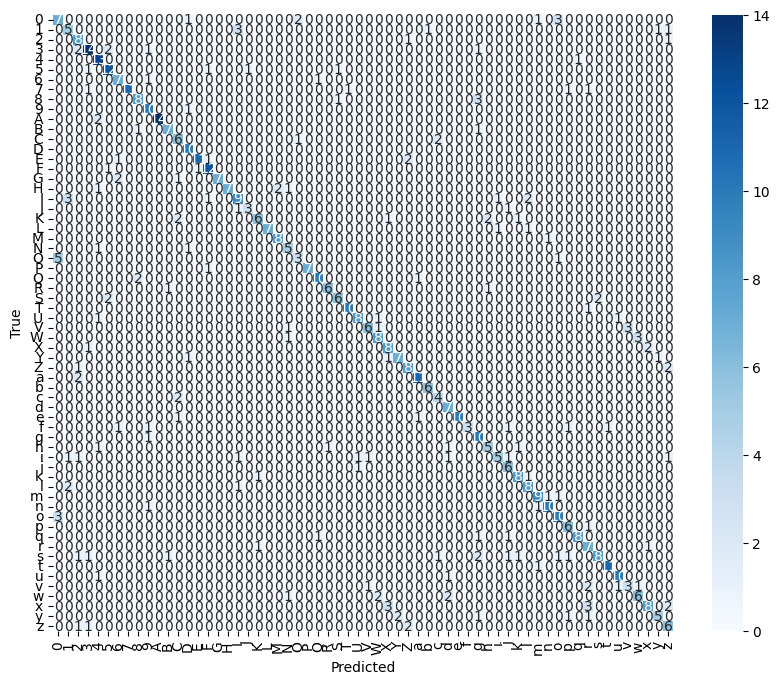

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Apply data augmentation while fitting the model
model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
 3/86 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.4688 - loss: 1.8890  

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.4345 - loss: 2.1749 - val_accuracy: 0.6862 - val_loss: 1.0116
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.4865 - loss: 1.7828 - val_accuracy: 0.7126 - val_loss: 0.9627
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.5000 - loss: 1.7218 - val_accuracy: 0.6994 - val_loss: 1.0190
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5214 - loss: 1.5938 - val_accuracy: 0.7258 - val_loss: 0.9319
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.5059 - loss: 1.6455 - val_accuracy: 0.7155 - val_loss: 0.8778
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.5524 - loss: 1.5019 - val_accuracy: 0.7185 - val_loss: 0.8795
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5507 - loss: 1.5102 - val_accuracy: 0.7287 - val_loss: 0.8618
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5631 - loss: 1.4360 - val_accuracy: 0.7317 - val_loss: 0.

In [ ]:
model.save('handwritten_character_model.h5')